<a href="https://colab.research.google.com/github/plaban1981/Deep_Learning_Research_Paper_Implementation/blob/main/Matdun_Labs_Technical_Task_version_final_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What is the fundus?

The fundus is the interior lining of the eyeball, including the retina (the light-sensitive screen), optic disc (the head of the nerve to the eye), and the macula (the small spot in the retina where vision is keenest). The fundus is the portion of the inner eye that can be seen during an eye examination by looking through the pupil.
This is what a fundus image looks like:

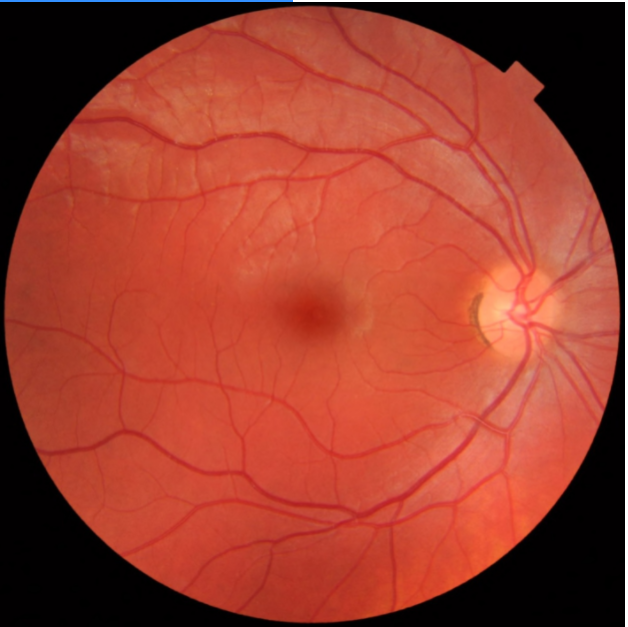



Multiple modalities of diagnostic devices are available for diagnosing eye diseases. Fundus imaging forms the primary source for diagnosing eye diseases. Furthermore, since the eye provides direct non-invasive imaging of arteries and veins, a fundus image can also help diagnose cardio vascular diseases non-invasively.

## DRIMDB (Diabetic Retinopathy Images Database) Database for Quality Testing of Retinal Images

Data : https://academictorrents.com/details/99811ba62918f8e73791d21be29dcc372d660305

## Download Data

In [ ]:
!pip install academictorrents

     |████████████████████████████████| 624 kB 2.3 MB/s 
     |████████████████████████████████| 87 kB 6.1 MB/s 
  Created wheel for academictorrents: filename=academictorrents-2.3.3-py3-none-any.whl size=21017 sha256=470ae6a8f983a2838c5542327b1850b1aac877cfad1402748c31bbae013080a5
  Stored in directory: /root/.cache/pip/wheels/9b/fc/db/f9c5a94d64997d541a4c9ce73ab4a8d86a2c9dc1f3c71cf829
  Created wheel for bitstring: filename=bitstring-3.1.5-py3-none-any.whl size=36532 sha256=7c7740495df6c9510149b2b8b8def2c666d47a680091339090262c61832a49b1
  Stored in directory: /root/.cache/pip/wheels/6f/f1/9d/547cc348ef2ae19acc1d84d20d36a05034a7d407a85ae0406f
  Created wheel for PyPubSub: filename=PyPubSub-3.3.0-py3-none-any.whl size=80830 sha256=34cbe93ab18fd8812811b632e241a021b92ed14b49b55e790f819aeaa95e8e62
  Stored in directory: /root/.cache/pip/wheels/6e/44/7f/581b129892efbc1d8ad2a07b6ed80c11d9f804e1c58e122c97
Successfully built academictorrents bitstring PyPubSub


In [ ]:
!at-get 99811ba62918f8e73791d21be29dcc372d660305

Torrent name: DRIMDB.rar, Size: 17.07MB
Checking pieces on disk...
100% 3/3 [00:00<00:00, 15887.52it/s]
Found 0 finished pieces out of 3 total pieces.
Total Length: 17074713, Downloaded: 297497, BT:0, Web:2, (67.19kB/s)
 Download Complete!
Exiting...


## Export Data to google drive

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## unrar the rar file

In [ ]:
%%capture
!unrar x -Y "/content/DRIMDB.rar" "/content/drive/MyDrive/matdun"

## Labels/Folders in the data provided

In [ ]:
import os
os.listdir("/content/drive/MyDrive/matdun/DRIMDB")

['Good', 'Outlier', 'Bad']

## Set the datapath

In [ ]:
main_data_path = "/content/drive/MyDrive/matdun/DRIMDB"

## Task

In this notebook you will aim to implement the EyeQual architecture to determine whether or not the fundus image is of diagnosible quality.


*  Perform EDA on the data
* Write relevant data loaders
* Implement the model from scratch in PyTorch
* Perform hyperparameter optimization
* Explain what the model is learning (check out the authors explainability procedure)


## Implementing the paper using Tensorflow

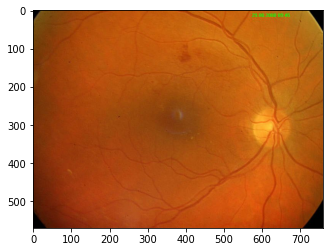

In [ ]:
import PIL
import matplotlib.pyplot as plt
image = PIL.Image.open("/content/drive/MyDrive/matdun/DRIMDB/Good/drimdb_good/iwebalbumfiles/00692c126de3460b843a53fffcd78284.jpg")
plt.imshow(image)

In [ ]:
len(os.listdir("/content/drive/MyDrive/matdun/DRIMDB/Good/drimdb_good/iwebalbumfiles"))

265

## Import Libraries

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#

import os
import cv2
from PIL import Image

%matplotlib inline

# import warnings
import warnings
warnings.filterwarnings('ignore')

## Declare list variables to store the image and corresponding label

In [3]:
dataset = []
label = []

## Process Data for each label

In [4]:
bad_dir = "/content/drive/MyDrive/matdun/DRIMDB/Bad"
good_dir = "/content/drive/MyDrive/matdun/DRIMDB/Good"
#outlier =  "/content/drive/MyDrive/matdun/DRIMDB/Outlier"

## Visualize a good image to check on the image stats

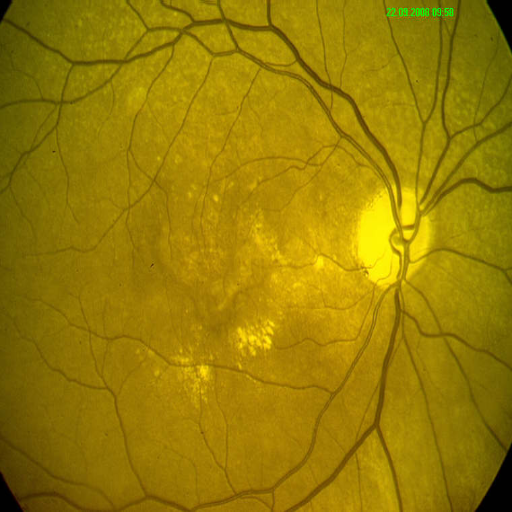

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
image = cv2.imread("/content/drive/MyDrive/matdun/DRIMDB/Good/drimdb_good (1).jpg")
image = cv2.resize(image,(512, 512))
cv2_imshow(image)


In [ ]:
print(image.shape)

(512, 512, 3)


In [5]:
label_mapping ={'Bad':0,'Good':1}

## Converting the images into an array of shape(512,512) with 3 channels and generate labels for each corresponding images

In [6]:
from tqdm import tqdm
good_images = os.listdir(good_dir)
for i, image_name in tqdm(enumerate(good_images)):
    try:
        if (image_name.split('.')[1] == 'jpg'):
            image = cv2.imread(good_dir+"/"+image_name)
            image = cv2.resize(image,(512,512))
            dataset.append(image)
            label.append(1)
    except Exception:
        print("Could not read image {} with name {}".format(i, image_name))

126it [01:26,  1.46it/s]

Could not read image 125 with name drimdb_good


In [7]:
len(dataset),len(label)

(125, 125)

In [9]:
bad_images = os.listdir(bad_dir)
for i, image_name in tqdm(enumerate(bad_images)):
    try:
        if (image_name.split('.')[1] == 'jpg'):
            image = cv2.imread(bad_dir+"/"+image_name)
            image = cv2.resize(image,(512,512))
            dataset.append(image)
            label.append(0)
    except Exception:
        print("Could not read image {} with name {}".format(i, image_name))

70it [00:45,  1.55it/s]

Could not read image 69 with name drimdb_bad


In [10]:
len(dataset),len(label)

(194, 194)

## Prepare a Dataframe for images retrieved and corresponding labels

In [11]:
df = pd.DataFrame({'Filename':dataset,'Label':label})

In [ ]:
df.head()

Filename  Label
0  [[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ...      1
1  [[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ...      1
2  [[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ...      1
3  [[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ...      1
4  [[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ...      1

## Randomly Visualize 5 Good Sample Images

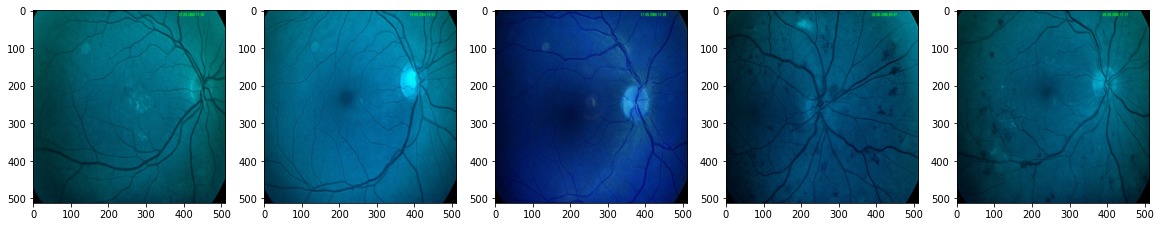

In [ ]:
plt.figure(figsize = (20, 12))
dataset_good = df[df['Label'] == 1]['Filename'].values
for i , image_index in enumerate(np.random.randint(len(good_images),size=5)):
  plt.subplot(1,5,i  + 1)
  plt.imshow(dataset_good[image_index])

##Randomly Visualize 5 Bad Sample Images

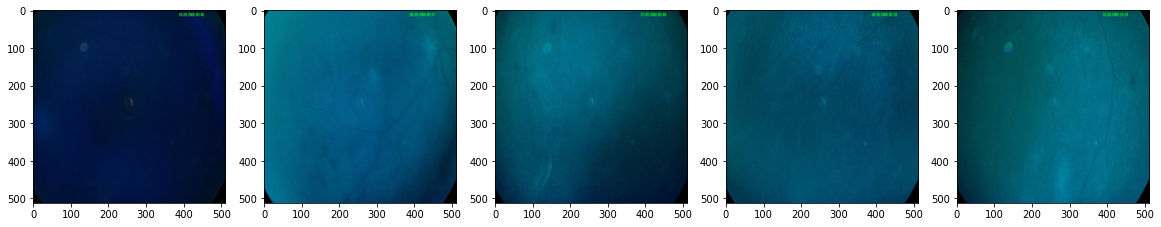

In [ ]:
plt.figure(figsize = (20, 12))
dataset_bad = df[df['Label'] == 0]['Filename'].values
for i , image_index in enumerate(np.random.randint(len(bad_images),size=5)):
  plt.subplot(1,5,i  + 1)
  plt.imshow(dataset_bad[image_index])

## Converting the features and labels into an array

In [12]:
X = np.array(dataset)
print(X.shape)
Y= np.array(label)
Y.shape

(194, 512, 512, 3)


(194,)

Visualize label counts

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


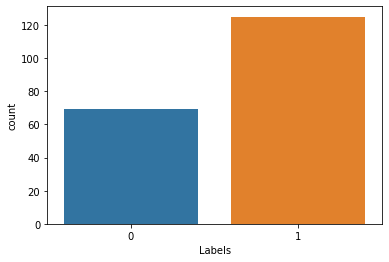

In [ ]:
import seaborn as sns
sns.countplot(label)
plt.xlabel('Labels')
plt.show()

## Train Test Split

In [13]:
from sklearn.model_selection import train_test_split
# Split data into train/test = 80%/20%
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=42)

In [23]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(155, 512, 512, 3)
(39, 512, 512, 3)
(155,)
(39,)


## Define a Model

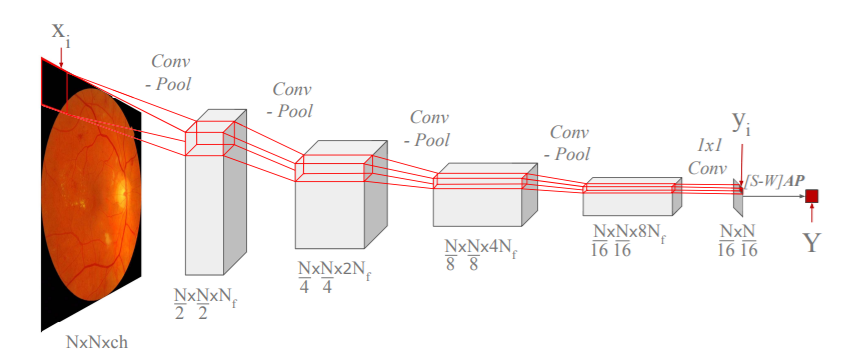

**Proposed EyeQual method.** 

* Convolutional Layers with 3 × 3 kernels are followed by max-pooling layers until the
receptive field of the last layer achieves the desired patch size. 

* Note that yi only depends on the patch xi. Then, the instance’s
labels are combined using a pooling function (i.e. Shifted Weighted Average Pooling) into the image label Y . 

* In this work we
used 512 × 512 RGB input images (N = 512 and ch = 3) and Nf = 64

In [94]:
import tensorflow as tf
from tensorflow.keras.layers import Layer
from tensorflow.keras import activations
from tensorflow.keras import constraints
from tensorflow.keras import regularizers
from tensorflow.keras import initializers
from tensorflow.keras.layers import InputSpec
import tensorflow.keras.backend as K
import numpy as np

class ShiftedWeightedAveragePooling(Layer):

    def __init__(self, output_dim, init='glorot_uniform',
                 activation=None, weights=None,
                 W_regularizer=None, b_regularizer=None, activity_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True, input_dim=None,**kwargs):
        self.init = initializers.get(init)
        self.activation = activations.get(activation)
        self.output_dim = output_dim
        self.input_dim = input_dim

        self.W_regularizer = regularizers.get(W_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)
        self.activity_regularizer = regularizers.get(activity_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        self.initial_weights = weights
        #self.input_spec = [InputSpec(ndim='1+')]

        if self.input_dim:
            kwargs['input_shape'] = (self.input_dim,)
        super(ShiftedWeightedAveragePooling, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) >= 2
        input_dim = input_shape[-1]
        self.input_dim = input_dim
        #self.input_spec = [InputSpec(dtype=K.floatx(),ndim='1+')]

        self.W = self.add_weight(shape=(input_dim, self.output_dim),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        if self.bias:
            self.b = self.add_weight(shape=(self.output_dim,),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)
            w, b = self.get_weights()
            w = w / np.sum(np.absolute(w))
            self.set_weights([w, b])
        else:
            self.b = None

        if self.initial_weights is not None:
            self.set_weights(self.initial_weights)
            del self.initial_weights
        self.built = True

    def call(self, x, mask=None):
        output = K.dot(x, K.abs(self.W))
        if self.bias:
            output -= 0.5 * np.ones((1,))
            output += self.b
        return self.activation(output)

    def get_output_shape_for(self, input_shape):
        assert input_shape and len(input_shape) >= 2
        assert input_shape[-1] and input_shape[-1] == self.input_dim
        output_shape = list(input_shape)
        output_shape[-1] = self.output_dim
        return tuple(output_shape)
        #return (input_shape[0], self.output_dim)

   

In [110]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,AveragePooling2D,Flatten, Dense
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Flatten
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Conv2D,Conv1D
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D

model = Sequential([
    #input layer                
    Conv2D(64, (2, 2), activation='relu', input_shape=(512, 512, 3),padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    # Hidden Layer1
    Conv2D(128,(4, 4),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    # Hidden Layer2
    Conv2D(256,(8, 8), activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    BatchNormalization(),
    # Hidden Layer3
    Conv2D(512,(16, 16),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    BatchNormalization(),
    #a 1 × 1 convolution followed by a sigmoid function to obtain the label of each patch
    Conv2D(1,(16, 16),activation='sigmoid',padding='same'),
    BatchNormalization(),
    Flatten(),
    #Dense(1,activation='sigmoid'),
    ShiftedWeightedAveragePooling(1, activation='sigmoid', W_regularizer=l2(1e-1),init='one', b_regularizer= l2(1e-1),name='pool')
])

In [111]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_75 (Conv2D)          (None, 512, 512, 64)      832       
                                                                 
 max_pooling2d_60 (MaxPoolin  (None, 256, 256, 64)     0         
 g2D)                                                            
                                                                 
 batch_normalization_75 (Bat  (None, 256, 256, 64)     256       
 chNormalization)                                                
                                                                 
 conv2d_76 (Conv2D)          (None, 256, 256, 128)     131200    
                                                                 
 max_pooling2d_61 (MaxPoolin  (None, 128, 128, 128)    0         
 g2D)                                                            
                                                     

In [112]:
my_callbacks = [
               tf.keras.callbacks.ModelCheckpoint("/content", monitor = 'val_loss',verbose = 1,save_weights_only=False, save_best_only = True),
               tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='min'),
              tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='min',min_delta=1e-4)
	]


In [113]:
import tensorflow.keras.backend as K
def get_f1(y_true, y_pred):
  true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
  possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
  predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
  precision = true_positives / (predicted_positives + K.epsilon())
  recall = true_positives / (possible_positives + K.epsilon())
  f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
  return f1_val

In [114]:
from sklearn.utils import compute_class_weight
classes = np.unique(y_train)
class_weight = compute_class_weight(class_weight="balanced", classes=classes, y=y_train)
class_weight_dict = dict(zip(classes, class_weight))
class_weight_dict

{0: 1.3596491228070176, 1: 0.7908163265306123}

In [115]:
# compile the model
model.compile(optimizer =tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                  metrics=["accuracy",get_f1],
                  loss= tf.keras.losses.BinaryCrossentropy())

In [116]:
# fit the model
train_history = model.fit(X_train, y_train, 
                          epochs=25, 
                          batch_size=8, 
                          class_weight=class_weight_dict,
                          validation_data=(X_test,y_test),
                          verbose=2,
                          callbacks=[my_callbacks])

Epoch 1/25

Epoch 00001: val_loss improved from inf to 0.90345, saving model to /content
INFO:tensorflow:Assets written to: /content/assets


INFO:tensorflow:Assets written to: /content/assets


20/20 - 27s - loss: 0.6041 - accuracy: 0.6516 - get_f1: 0.6608 - val_loss: 0.9035 - val_accuracy: 0.3077 - val_get_f1: 0.0000e+00 - lr: 0.0010 - 27s/epoch - 1s/step
Epoch 2/25

Epoch 00002: val_loss improved from 0.90345 to 0.61541, saving model to /content
INFO:tensorflow:Assets written to: /content/assets


INFO:tensorflow:Assets written to: /content/assets


20/20 - 18s - loss: 0.5137 - accuracy: 0.8129 - get_f1: 0.8499 - val_loss: 0.6154 - val_accuracy: 0.7179 - val_get_f1: 0.8167 - lr: 0.0010 - 18s/epoch - 910ms/step
Epoch 3/25

Epoch 00003: val_loss improved from 0.61541 to 0.60656, saving model to /content
INFO:tensorflow:Assets written to: /content/assets


INFO:tensorflow:Assets written to: /content/assets


20/20 - 18s - loss: 0.4903 - accuracy: 0.7871 - get_f1: 0.8289 - val_loss: 0.6066 - val_accuracy: 0.7436 - val_get_f1: 0.8295 - lr: 0.0010 - 18s/epoch - 898ms/step
Epoch 4/25

Epoch 00004: val_loss did not improve from 0.60656
20/20 - 13s - loss: 0.4872 - accuracy: 0.7935 - get_f1: 0.8393 - val_loss: 0.6228 - val_accuracy: 0.7436 - val_get_f1: 0.8295 - lr: 0.0010 - 13s/epoch - 664ms/step
Epoch 5/25

Epoch 00005: val_loss did not improve from 0.60656
20/20 - 13s - loss: 0.5170 - accuracy: 0.8129 - get_f1: 0.8477 - val_loss: 0.8056 - val_accuracy: 0.5128 - val_get_f1: 0.5800 - lr: 0.0010 - 13s/epoch - 664ms/step
Epoch 6/25

Epoch 00006: val_loss improved from 0.60656 to 0.44156, saving model to /content
INFO:tensorflow:Assets written to: /content/assets


INFO:tensorflow:Assets written to: /content/assets


20/20 - 18s - loss: 0.5577 - accuracy: 0.7871 - get_f1: 0.8171 - val_loss: 0.4416 - val_accuracy: 0.8205 - val_get_f1: 0.8727 - lr: 0.0010 - 18s/epoch - 904ms/step
Epoch 7/25

Epoch 00007: val_loss did not improve from 0.44156
20/20 - 13s - loss: 0.4874 - accuracy: 0.8000 - get_f1: 0.8286 - val_loss: 0.4480 - val_accuracy: 0.7949 - val_get_f1: 0.8595 - lr: 0.0010 - 13s/epoch - 664ms/step
Epoch 8/25

Epoch 00008: val_loss improved from 0.44156 to 0.35423, saving model to /content
INFO:tensorflow:Assets written to: /content/assets


INFO:tensorflow:Assets written to: /content/assets


20/20 - 18s - loss: 0.4853 - accuracy: 0.8129 - get_f1: 0.8372 - val_loss: 0.3542 - val_accuracy: 0.8462 - val_get_f1: 0.8825 - lr: 0.0010 - 18s/epoch - 888ms/step
Epoch 9/25

Epoch 00009: val_loss did not improve from 0.35423
20/20 - 13s - loss: 0.4777 - accuracy: 0.8129 - get_f1: 0.8310 - val_loss: 0.5362 - val_accuracy: 0.7692 - val_get_f1: 0.7685 - lr: 0.0010 - 13s/epoch - 664ms/step
Epoch 10/25

Epoch 00010: val_loss did not improve from 0.35423
20/20 - 13s - loss: 0.5202 - accuracy: 0.7935 - get_f1: 0.8300 - val_loss: 0.5017 - val_accuracy: 0.7949 - val_get_f1: 0.8023 - lr: 0.0010 - 13s/epoch - 664ms/step
Epoch 11/25

Epoch 00011: val_loss did not improve from 0.35423
20/20 - 13s - loss: 0.3926 - accuracy: 0.8452 - get_f1: 0.8583 - val_loss: 0.6343 - val_accuracy: 0.6667 - val_get_f1: 0.6909 - lr: 0.0010 - 13s/epoch - 664ms/step
Epoch 12/25

Epoch 00012: val_loss did not improve from 0.35423
20/20 - 13s - loss: 0.3961 - accuracy: 0.8516 - get_f1: 0.8763 - val_loss: 0.5278 - val_a

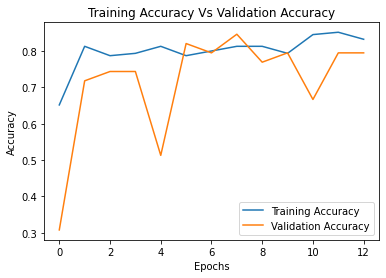

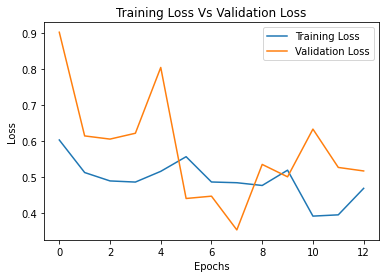

In [117]:
#PLOT HISTORY
	#		:
plt.plot(train_history.history['accuracy'],label='Training Accuracy')
plt.plot(train_history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Vs Validation Accuracy')
plt.legend()
plt.show()
#
plt.plot(train_history.history['loss'],label='Training Loss')
plt.plot(train_history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Vs Validation Loss')
plt.legend()
plt.show()

## Make Predictions on test data

In [118]:
predictions = model.predict(X_test)

In [120]:
preds = []
for pred in predictions:
  if pred >= 0.5:
    preds.append(1)
  else:
    preds.append(0)

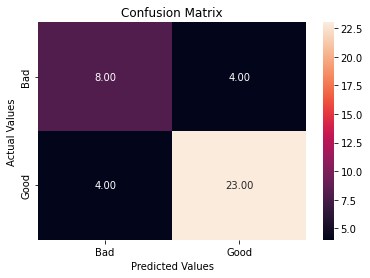

In [121]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cf = confusion_matrix(y_test,preds)
accuracy = accuracy_score(y_test,preds)
sns.heatmap(cf,annot=True,fmt=".2f",xticklabels=['Bad','Good'],yticklabels=['Bad','Good'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title(f'Confusion Matrix')
plt.show()

In [122]:
print(f'Validation Accuracy score : {accuracy}')
print(classification_report(y_test,preds))

Validation Accuracy score : 0.7948717948717948
              precision    recall  f1-score   support

           0       0.67      0.67      0.67        12
           1       0.85      0.85      0.85        27

    accuracy                           0.79        39
   macro avg       0.76      0.76      0.76        39
weighted avg       0.79      0.79      0.79        39



## Model Explainability using Gradient-weighted Class Activation Mapping (Grad-CAM)

1. finding the final convolutional layer in the network 
2. Examine the gradient information flowing into that layer.

In [ ]:
# import the necessary packages
from tensorflow.keras.models import Model
import tensorflow as tf
import numpy as np
import cv2

class GradCAM:
	def __init__(self, model, classIdx, layerName=None):
		# store the model, the class index used to measure the class
		# activation map, and the layer to be used when visualizing
		# the class activation map
		self.model = model
		self.classIdx = classIdx
		self.layerName = layerName

		# if the layer name is None, attempt to automatically find
		# the target output layer
		if self.layerName is None:
			self.layerName = self.find_target_layer()

	def find_target_layer(self):
		# attempt to find the final convolutional layer in the network
		# by looping over the layers of the network in reverse order
		for layer in reversed(self.model.layers):
			# check to see if the layer has a 4D output
			if len(layer.output_shape) == 4:
				return layer.name

		# otherwise, we could not find a 4D layer so the GradCAM
		# algorithm cannot be applied
		raise ValueError("Could not find 4D layer. Cannot apply GradCAM.")

	def compute_heatmap(self, image, eps=1e-8):
		# construct our gradient model by supplying (1) the inputs
		# to our pre-trained model, (2) the output of the (presumably)
		# final 4D layer in the network, and (3) the output of the
		# softmax activations from the model
		gradModel = Model(
			inputs=[self.model.input],
			outputs=[self.model.get_layer(self.layerName).output, 
				self.model.output])

		# record operations for automatic differentiation
		with tf.GradientTape() as tape:
			# cast the image tensor to a float-32 data type, pass the
			# image through the gradient model, and grab the loss
			# associated with the specific class index
			inputs = tf.cast(image, tf.float32)
			(convOutputs, predictions) = gradModel(inputs)
			loss = predictions[:, self.classIdx]

		# use automatic differentiation to compute the gradients
		grads = tape.gradient(loss, convOutputs)
		# compute the guided gradients
		castConvOutputs = tf.cast(convOutputs > 0, "float32")
		castGrads = tf.cast(grads > 0, "float32")
		guidedGrads = castConvOutputs * castGrads * grads

		# the convolution and guided gradients have a batch dimension
		# (which we don't need) so let's grab the volume itself and
		# discard the batch
		convOutputs = convOutputs[0]
		guidedGrads = guidedGrads[0]

		# compute the average of the gradient values, and using them
		# as weights, compute the ponderation of the filters with
		# respect to the weights
		weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
		cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)

		# grab the spatial dimensions of the input image and resize
		# the output class activation map to match the input image
		# dimensions
		(w, h) = (image.shape[2], image.shape[1])
		heatmap = cv2.resize(cam.numpy(), (w, h))

		# normalize the heatmap such that all values lie in the range
		# [0, 1], scale the resulting values to the range [0, 255],
		# and then convert to an unsigned 8-bit integer
		numer = heatmap - np.min(heatmap)
		denom = (heatmap.max() - heatmap.min()) + eps
		heatmap = numer / denom
		heatmap = (heatmap * 255).astype("uint8")

		# return the resulting heatmap to the calling function
		return heatmap

	def overlay_heatmap(self, heatmap, image, alpha=0.5,
		colormap=cv2.COLORMAP_VIRIDIS):
		# apply the supplied color map to the heatmap and then
		# overlay the heatmap on the input image
		heatmap = cv2.applyColorMap(heatmap, colormap)
		output = cv2.addWeighted(image, alpha, heatmap, 1 - alpha, 0)

		# return a 2-tuple of the color mapped heatmap and the output,
		# overlaid image
		return (heatmap, output)


In [ ]:
image = np.array([X_test[0].tolist()])

In [ ]:
image.shape

(1, 512, 512, 3)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 510, 510, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 255, 255, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 252, 252, 2)       2050      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 126, 126, 2)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 119, 119, 4)       516       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 59, 59, 4)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 44, 44, 8)         8

In [ ]:
orig = cv2.imread("/content/drive/MyDrive/matdun/DRIMDB/Good/drimdb_good (44).jpg")
orig = cv2.resize(orig, (512, 512))

## Original Image

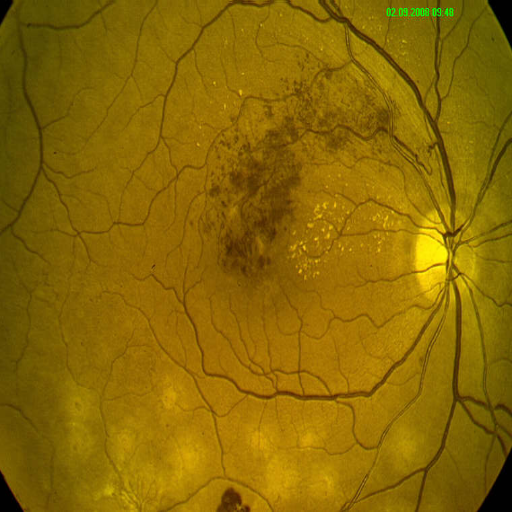

In [ ]:
cv2_imshow(orig)

In [ ]:
# initialize our gradient class activation map and build the heatmap
cam = GradCAM(model,1)
heatmap = cam.compute_heatmap(image)

# resize the resulting heatmap to the original input image dimensions
# and then overlay heatmap on top of the image
heatmap = cv2.resize(heatmap, (orig.shape[1], orig.shape[0]))
(heatmap, output) = cam.overlay_heatmap(heatmap, orig, alpha=0.5)

In [ ]:
# use the network to make predictions on the input image and find
# the class label index with the largest corresponding probability
preds = model.predict(image)
i = np.argmax(preds,axis=1)[0]

In [ ]:
label_mapping ={0:'Good',1:'Bad',2:'Outlier'}

(512, 1536, 3)


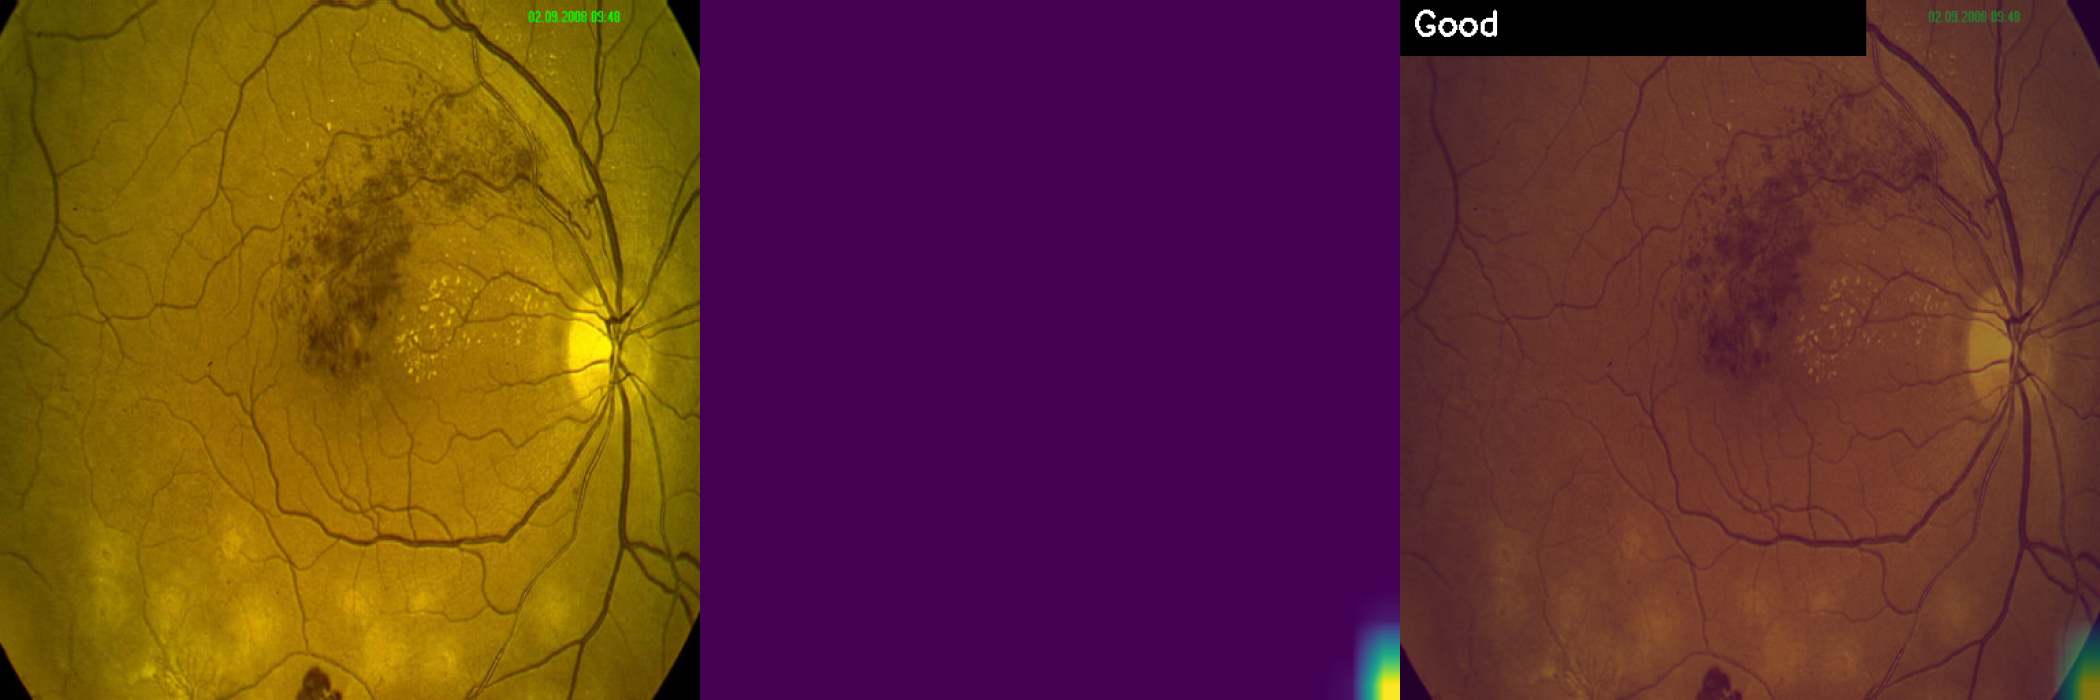

In [ ]:
from google.colab.patches import cv2_imshow
import imutils
# draw the predicted label on the output image
label=1
cv2.rectangle(output, (0, 0), (340, 40), (0, 0, 0), -1)
cv2.putText(output, label_mapping[i], (10, 25), cv2.FONT_HERSHEY_SIMPLEX,0.8, (255, 255, 255), 2)
# display the original image and resulting heatmap and output image
# to our screen
output = np.hstack([orig, heatmap, output])
print(output.shape)
output = imutils.resize(output, height=700)

cv2_imshow(output)

## Use Transfer Learning to perform the Imageclassification

In [ ]:
filename = []
label = []

In [ ]:
from tqdm import tqdm
good_images = os.listdir(good_dir)
for i, image_name in tqdm(enumerate(good_images)):
    try:
        if (image_name.split('.')[1] == 'jpg'):
            image_path = os.path.join(good_dir,image_name)
            filename.append(image_path)
            label.append('Good')
    except Exception:
        print("Could not read image {} with name {}".format(i, image_name))

126it [00:00, 276258.39it/s]

Could not read image 125 with name drimdb_good


In [ ]:
len(filename),len(label)

(125, 125)

In [ ]:
bad_images = os.listdir(bad_dir)
for i, image_name in tqdm(enumerate(bad_images)):
    try:
        if (image_name.split('.')[1] == 'jpg'):
            image_path = os.path.join(bad_dir,image_name)
            filename.append(image_path)
            label.append('Bad')
    except Exception:
        print("Could not read image {} with name {}".format(i, image_name))

70it [00:00, 174554.86it/s]

Could not read image 69 with name drimdb_bad


In [ ]:
len(filename),len(label)

(194, 194)

In [ ]:
outlier_images = os.listdir(outlier)
for i, image_name in tqdm(enumerate(outlier_images)):
    try:
        if (image_name.split('.')[1] == 'jpg'):
            image_path = os.path.join(outlier,image_name)
            filename.append(image_path)
            label.append('Outlier')
    except Exception:
        print("Could not read image {} with name {}".format(i, image_name))

23it [00:00, 23517.55it/s]

Could not read image 22 with name drimdb_outlier


In [ ]:
len(filename),len(label)

(216, 216)

In [ ]:
df = pd.DataFrame({'Filename':filename,'Label':label})
df.head()

Filename Label
0  /content/drive/MyDrive/matdun/DRIMDB/Good/drim...  Good
1  /content/drive/MyDrive/matdun/DRIMDB/Good/drim...  Good
2  /content/drive/MyDrive/matdun/DRIMDB/Good/drim...  Good
3  /content/drive/MyDrive/matdun/DRIMDB/Good/drim...  Good
4  /content/drive/MyDrive/matdun/DRIMDB/Good/drim...  Good

##Shuffle the dataframe

In [ ]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()

Filename Label
0  /content/drive/MyDrive/matdun/DRIMDB/Good/drim...  Good
1  /content/drive/MyDrive/matdun/DRIMDB/Good/drim...  Good
2  /content/drive/MyDrive/matdun/DRIMDB/Bad/drimd...   Bad
3  /content/drive/MyDrive/matdun/DRIMDB/Good/drim...  Good
4  /content/drive/MyDrive/matdun/DRIMDB/Good/drim...  Good

##Visualize the labels

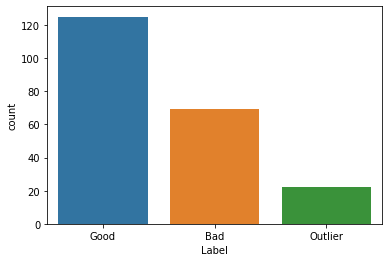

In [ ]:
sns.countplot(x='Label',data=df)

In [ ]:
image_samples = df['Filename'].values.tolist()
image_labels = df['Label'].values.tolist()


In [ ]:
%%capture
!pip install ipyplot


        WARNING! Google Colab Environment detected!
        You might encounter issues while running in Google Colab environment.
        If images are not displaying properly please try setting `base_64` param to `True`.
        



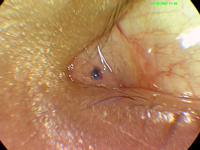
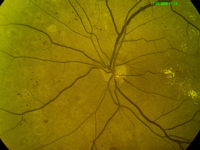
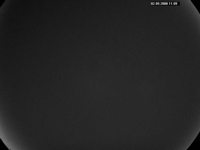
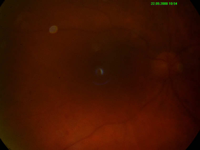
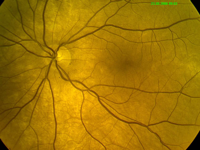
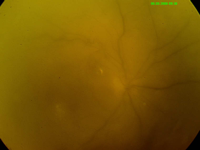
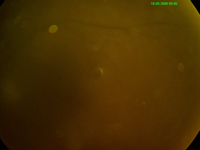
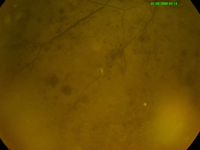
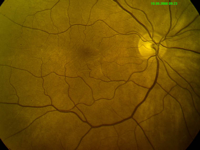
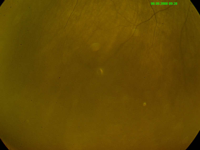
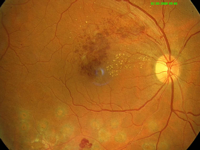
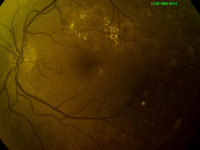
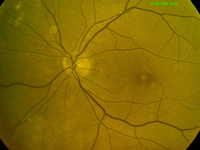
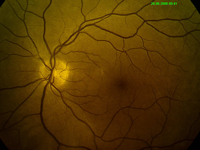
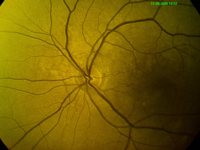
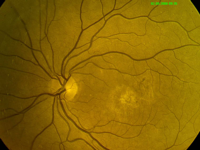


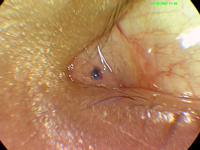
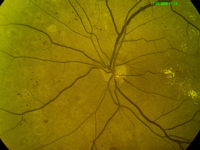
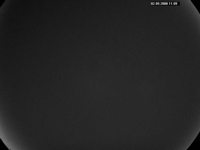
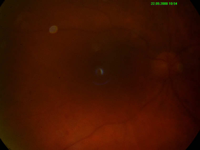
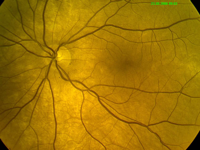
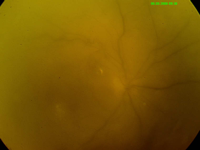
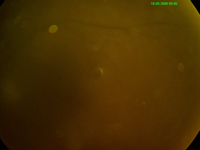
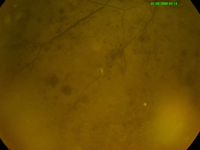
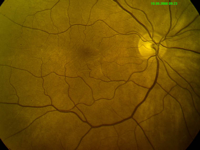
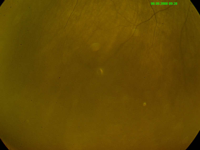
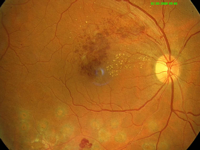
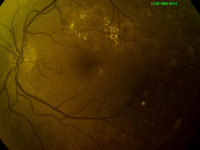
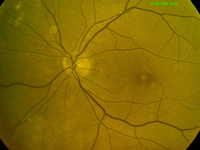
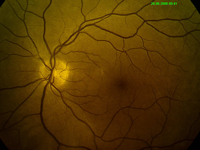
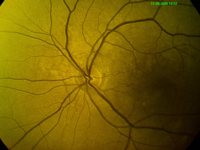
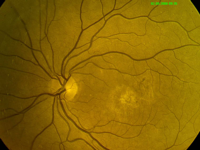

In [ ]:
import random
import ipyplot
image_array = []
image_label_array = []
for i in range(16):
  index = random.randint(1,100)
  img = Image.open(image_samples[index])
  image_array.append(img)
  image_label_array.append(image_labels[index])
ipyplot.plot_images(image_array,image_label_array,img_width=200)

##Transfer Learning using Keras

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Input, Lambda, Flatten, TimeDistributed, Activation, MaxPool2D
from tensorflow.keras.layers import Add, Reshape, MaxPooling2D, Concatenate, Embedding, RepeatVector, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.regularizers import *
#
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import seaborn as sns
sns.set_style('darkgrid')
#
import os
import shutil
import cv2
import glob
from tqdm.notebook import tqdm
from tqdm import tqdm
from PIL import Image
#
import gc
#
import warnings
warnings.filterwarnings('ignore')

## Image data generator

In [ ]:
batch_size=8
image_shape=(512,512,3)
class_mode='categorical'

In [ ]:
generator = ImageDataGenerator(rescale=1./255)

## Train / Validation Data Generator

In [ ]:
generator = ImageDataGenerator(rescale=1./255)

## Define a function for getting model name in each of the k iterations

In [ ]:
def get_model_name(k):
  return 'model_'+str(k)+'.h5'

## Define a function to claibrate F1 Scores

In [ ]:
import keras.backend as K
def get_f1(y_true, y_pred):
  true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
  possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
  predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
  precision = true_positives / (predicted_positives + K.epsilon())
  recall = true_positives / (possible_positives + K.epsilon())
  f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
  return f1_val

## Define Model

In [ ]:
def create_model():
  model = Sequential()

  conv_base = tf.keras.applications.DenseNet121(input_shape=(512,512,3), include_top=False, pooling='max',weights='imagenet')
  model.add(conv_base)
  model.add(BatchNormalization())
  model.add(Dense(2048, activation='relu', kernel_regularizer=l1_l2(0.01)))
  model.add(BatchNormalization())
  model.add(Dense(3, activation='softmax'))

  train_layers = [layer for layer in conv_base.layers[::-1][:5]]

  for layer in conv_base.layers:
    if layer in train_layers:
      layer.trainable = True
  return model

## Model Training and Evaluation

* Train the Model using StartifiedKFold Crossvalidation technique
* Getting the folds and creating the data generators
* Training the model on each Fold and evaluating on the validation fold
* Making the predictions on the test data badsed on the training for the fold
* Saving the predictions for each fold in a list
* Taking the average of all the five predictions made on the basis of each fold for the final predictions

Found 172 validated image filenames belonging to 3 classes.
Found 44 validated image filenames belonging to 3 classes.
Epoch 1/10
21/21 [==============================] - 17s 335ms/step - loss: 339.3242 - accuracy: 0.6829 - get_f1: 0.6770 - val_loss: 260.8773 - val_accuracy: 0.3000 - val_get_f1: 0.3000

Epoch 00001: val_loss improved from inf to 260.87735, saving model to /content/drive/MyDrive/matdun/saved_model/model_1.h5
Epoch 2/10
21/21 [==============================] - 5s 249ms/step - loss: 149.3277 - accuracy: 0.5976 - get_f1: 0.5865 - val_loss: 1696.6674 - val_accuracy: 0.3000 - val_get_f1: 0.3000

Epoch 00002: val_loss did not improve from 260.87735
Epoch 3/10
21/21 [==============================] - 5s 248ms/step - loss: 64.6788 - accuracy: 0.6951 - get_f1: 0.6824 - val_loss: 43.9840 - val_accuracy: 0.4750 - val_get_f1: 0.4550

Epoch 00003: val_loss improved from 260.87735 to 43.98397, saving model to /content/drive/MyDrive/matdun/saved_model/model_1.h5
Epoch 4/10
21/21 [====

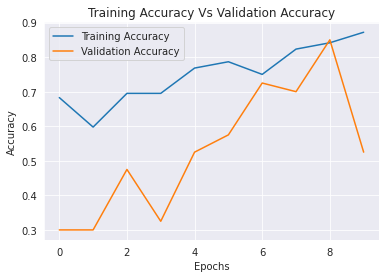

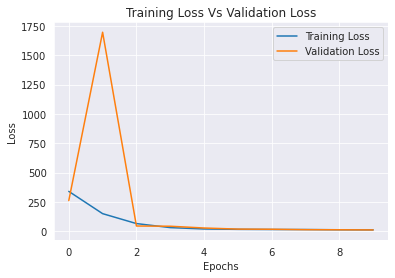

5/5 [==============================] - 2s 83ms/step
Found 173 validated image filenames belonging to 3 classes.
Found 43 validated image filenames belonging to 3 classes.
Epoch 1/10
21/21 [==============================] - 19s 417ms/step - loss: 341.2679 - accuracy: 0.6364 - get_f1: 0.6469 - val_loss: 222.2309 - val_accuracy: 0.6250 - val_get_f1: 0.6250

Epoch 00001: val_loss improved from inf to 222.23087, saving model to /content/drive/MyDrive/matdun/saved_model/model_2.h5
Epoch 2/10
21/21 [==============================] - 5s 249ms/step - loss: 150.3929 - accuracy: 0.6788 - get_f1: 0.6635 - val_loss: 143.7084 - val_accuracy: 0.3750 - val_get_f1: 0.3750

Epoch 00002: val_loss improved from 222.23087 to 143.70844, saving model to /content/drive/MyDrive/matdun/saved_model/model_2.h5
Epoch 3/10
21/21 [==============================] - 5s 250ms/step - loss: 65.2881 - accuracy: 0.7394 - get_f1: 0.7277 - val_loss: 74.0872 - val_accuracy: 0.3000 - val_get_f1: 0.3000

Epoch 00003: val_loss i

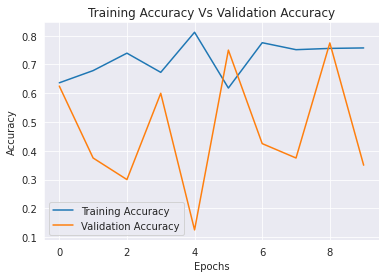

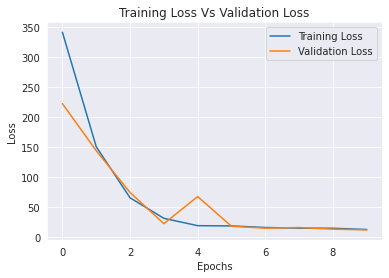

5/5 [==============================] - 2s 80ms/step
Found 173 validated image filenames belonging to 3 classes.
Found 43 validated image filenames belonging to 3 classes.
Epoch 1/10
21/21 [==============================] - 18s 349ms/step - loss: 340.8892 - accuracy: 0.6667 - get_f1: 0.6687 - val_loss: 641.0286 - val_accuracy: 0.3500 - val_get_f1: 0.3500

Epoch 00001: val_loss improved from inf to 641.02863, saving model to /content/drive/MyDrive/matdun/saved_model/model_3.h5
Epoch 2/10
21/21 [==============================] - 5s 252ms/step - loss: 143.7452 - accuracy: 0.7758 - get_f1: 0.7655 - val_loss: 293.2064 - val_accuracy: 0.3250 - val_get_f1: 0.3250

Epoch 00002: val_loss improved from 641.02863 to 293.20636, saving model to /content/drive/MyDrive/matdun/saved_model/model_3.h5
Epoch 3/10
21/21 [==============================] - 5s 253ms/step - loss: 59.0637 - accuracy: 0.8242 - get_f1: 0.8126 - val_loss: 169.0959 - val_accuracy: 0.3000 - val_get_f1: 0.3000

Epoch 00003: val_loss 

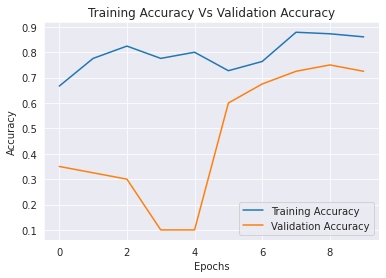

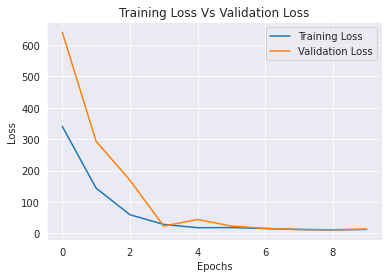

5/5 [==============================] - 2s 92ms/step
Found 173 validated image filenames belonging to 3 classes.
Found 43 validated image filenames belonging to 3 classes.
Epoch 1/10
21/21 [==============================] - 17s 344ms/step - loss: 343.5603 - accuracy: 0.6121 - get_f1: 0.6250 - val_loss: 244.8321 - val_accuracy: 0.1000 - val_get_f1: 0.1000

Epoch 00001: val_loss improved from inf to 244.83206, saving model to /content/drive/MyDrive/matdun/saved_model/model_4.h5
Epoch 2/10
21/21 [==============================] - 5s 255ms/step - loss: 145.7206 - accuracy: 0.8000 - get_f1: 0.8000 - val_loss: 127.0472 - val_accuracy: 0.3000 - val_get_f1: 0.3000

Epoch 00002: val_loss improved from 244.83206 to 127.04716, saving model to /content/drive/MyDrive/matdun/saved_model/model_4.h5
Epoch 3/10
21/21 [==============================] - 5s 252ms/step - loss: 60.0181 - accuracy: 0.7758 - get_f1: 0.7766 - val_loss: 36.4705 - val_accuracy: 0.8000 - val_get_f1: 0.7512

Epoch 00003: val_loss i

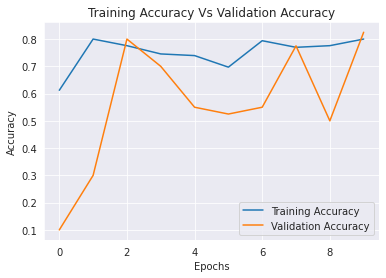

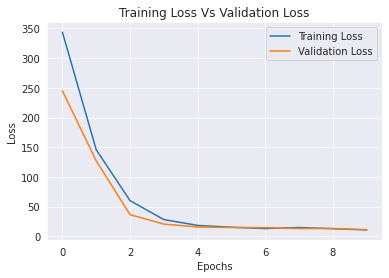

5/5 [==============================] - 2s 88ms/step
Found 173 validated image filenames belonging to 3 classes.
Found 43 validated image filenames belonging to 3 classes.
Epoch 1/10
21/21 [==============================] - 18s 344ms/step - loss: 338.6545 - accuracy: 0.7152 - get_f1: 0.7132 - val_loss: 254.7743 - val_accuracy: 0.3250 - val_get_f1: 0.3250

Epoch 00001: val_loss improved from inf to 254.77429, saving model to /content/drive/MyDrive/matdun/saved_model/model_5.h5
Epoch 2/10
21/21 [==============================] - 5s 253ms/step - loss: 139.5219 - accuracy: 0.7758 - get_f1: 0.7786 - val_loss: 97.9519 - val_accuracy: 0.1000 - val_get_f1: 0.1000

Epoch 00002: val_loss improved from 254.77429 to 97.95189, saving model to /content/drive/MyDrive/matdun/saved_model/model_5.h5
Epoch 3/10
21/21 [==============================] - 5s 251ms/step - loss: 56.3657 - accuracy: 0.7212 - get_f1: 0.7266 - val_loss: 100.7364 - val_accuracy: 0.2750 - val_get_f1: 0.2750

Epoch 00003: val_loss di

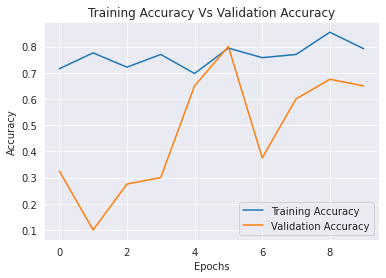

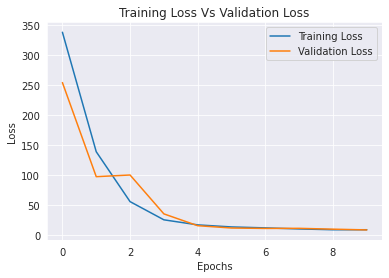

5/5 [==============================] - 2s 81ms/step


In [ ]:
from keras.models import load_model
VALIDATION_ACCURACY = []
VALIDAITON_LOSS = []
all_preds = []
dropout=.3
lr=.001
num_epochs = 15
save_dir = '/content/drive/MyDrive/matdun/saved_model/'
fold_var = 1
n_class = 2
skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)
#
for train_index, val_index in skf.split(df,df.Label):
	training_data = df.iloc[train_index]
	validation_data = df.iloc[val_index]
	
	train_data_generator = generator.flow_from_dataframe(training_data, 
                                                      #directory = dir_path,
			 	 	 	                                          x_col = "Filename", 
                                                      y_col = "Label",
						                                          class_mode = class_mode, 
                                                      batch_size = 8,
                                                      seed = 42,
                                                      shuffle = True,
                                                      target_size=(512,512))
	valid_data_generator  = generator.flow_from_dataframe(validation_data, 
                                                       #directory = dir_path,
							                                          x_col = "Filename", 
                                                        y_col = "Label",
						                                            class_mode = class_mode, 
                                                        batch_size = 8,
                                                        seed = 42,
                                                        shuffle = True,
                                                        target_size=(512,512))
	
	# CREATE NEW MODEL
	model = create_model()
	# COMPILE NEW MODEL
	model.compile(optimizer =tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                  metrics=["accuracy",get_f1],
                  loss= tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1))
	# CREATE CALLBACKS
	
	my_callbacks = [
               tf.keras.callbacks.ModelCheckpoint(save_dir+get_model_name(fold_var), monitor = 'val_loss',verbose = 1,save_weights_only=False, save_best_only = True),
              EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='min'),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='min',min_delta=1e-4)
	]

	# There can be other callbacks, but just showing one because it involves the model name
	# This saves the best model
	# FIT THE MODEL
	STEP_SIZE_TRAIN = train_data_generator.n//train_data_generator.batch_size
	STEP_SIZE_VALID = valid_data_generator.n//valid_data_generator.batch_size
	history = model.fit(
        train_data_generator,
        steps_per_epoch= STEP_SIZE_TRAIN,
        epochs=10,
        validation_data=valid_data_generator,
        validation_steps= STEP_SIZE_VALID,
        callbacks = [my_callbacks] 
        )
	#PLOT HISTORY
	#		:
	plt.plot(history.history['accuracy'],label='Training Accuracy')
	plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
	plt.xlabel('Epochs')
	plt.ylabel('Accuracy')
	plt.title('Training Accuracy Vs Validation Accuracy')
	plt.legend()
	plt.show()
  #
	plt.plot(history.history['loss'],label='Training Loss')
	plt.plot(history.history['val_loss'],label='Validation Loss')
	plt.xlabel('Epochs')
	plt.ylabel('Loss')
	plt.title('Training Loss Vs Validation Loss')
	plt.legend()
	plt.show()
	#		:
	
	# LOAD BEST MODEL to evaluate the performance of the model
	model.load_weights("/content/drive/MyDrive/matdun/saved_model/model_"+str(fold_var)+".h5")
	results = model.evaluate(valid_data_generator)
	results = dict(zip(model.metrics_names,results))
	
	VALIDATION_ACCURACY.append(results['accuracy'])
	VALIDAITON_LOSS.append(results['loss'])
  #
	preds = model.predict(valid_data_generator,steps=STEP_SIZE_VALID,verbose=1)
	all_preds.append(preds)
	#
	tf.keras.backend.clear_session()
	gc.collect()
	fold_var += 1


## Predictions on Validation data

In [ ]:
from sklearn.model_selection import train_test_split
X = df[['Filename']]
Y = df[['Label']]
_,X_test,_,y_test = train_test_split(X,Y,test_size=20,random_state=42)

## Test Data Generator

In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255)
test_generator=test_datagen.flow_from_dataframe(
dataframe=X_test,
x_col="Filename",
y_col=None,
batch_size=1,
seed=42,
shuffle=False,
class_mode=None,
target_size=(512,512))
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

Found 20 validated image filenames.


In [ ]:
# CREATE NEW MODEL
model = create_model()
#
all_preds = []
for fold_var in range(1,6):
  # LOAD BEST MODEL to evaluate the performance of the model
	model.load_weights("/content/drive/MyDrive/matdun/saved_model/model_"+str(fold_var)+".h5")
	preds = model.predict(test_generator,steps=STEP_SIZE_TEST,verbose=1)
	all_preds.append(preds)

20/20 [==============================] - 0s 20ms/step


In [ ]:
final_pred = (all_preds[0] + all_preds[1] + all_preds[2] + all_preds[3] + all_preds[4])/5
predictions = np.argmax(final_pred,axis=1)

In [ ]:
prediction_mapper = { v: k for k,v in valid_data_generator.class_indices.items()}
prediction_mapper

{0: 'Bad', 1: 'Good', 2: 'Outlier'}

In [ ]:
pred_dec = [prediction_mapper[i] for i in predictions]
pred_dec

['Bad',
 'Good',
 'Good',
 'Good',
 'Bad',
 'Bad',
 'Good',
 'Bad',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Bad',
 'Bad',
 'Good',
 'Bad',
 'Good',
 'Bad',
 'Good']

## Confusion Matrix

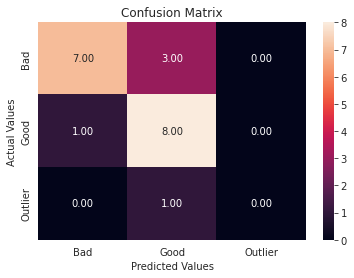

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cf = confusion_matrix(y_test,pred_dec)
accuracy = accuracy_score(y_test,pred_dec)
sns.heatmap(cf,annot=True,fmt=".2f",xticklabels=['Bad','Good','Outlier'],yticklabels=['Bad','Good','Outlier'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title(f'Confusion Matrix')
plt.show()

In [ ]:
print(f'Validation Accuracy score : {accuracy}')
print(classification_report(y_test,pred_dec))

Validation Accuracy score : 0.75
              precision    recall  f1-score   support

         Bad       0.88      0.70      0.78        10
        Good       0.67      0.89      0.76         9
     Outlier       0.00      0.00      0.00         1

    accuracy                           0.75        20
   macro avg       0.51      0.53      0.51        20
weighted avg       0.74      0.75      0.73        20



## Conclusion :

* By using Transfer Learning overall accuracy and F1 Scores associated with the labels has improved.

* Accuracy = 70% without Transfer Learning
* Accuracy = 75% using Transfer Learning
